In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

In [3]:
#Config information and query URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="

In [4]:
#lists to hold response info
temp = [] #weather_response['main']['temp']
latitude = [] #weather_response['coord']['lat']
humidity = [] #weather_response['main']['humidity']
cloudiness = [] #weather_response['clouds']['all']
wind_speed = [] #weather_response['wind']['speed']
city_list = [] #weather_response['name']

In [7]:
#loop and retrieve data for cities
for city in cities:
    weather_response = requests.get(query_url + city).json()
    
    try:
        print(f"Processing City: {city}")
        temp.append(weather_response['main']['temp'])
        latitude.append(weather_response['coord']['lat'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        city_list.append(weather_response['name'])
    except KeyError:
        print: "City not found.. skipping" 

Processing City: albany
Processing City: avarua
Processing City: arraial do cabo
Processing City: taolanaro
Processing City: ushuaia
Processing City: jamestown
Processing City: punta arenas
Processing City: busselton
Processing City: maputo
Processing City: aswan
Processing City: hilo
Processing City: barrow
Processing City: santa rosa
Processing City: charters towers
Processing City: saint george
Processing City: port elizabeth
Processing City: muscat
Processing City: new norfolk
Processing City: ponta do sol
Processing City: mozhaysk
Processing City: cap-aux-meules
Processing City: sangar
Processing City: sentyabrskiy
Processing City: chokurdakh
Processing City: tsihombe
Processing City: west wendover
Processing City: bredasdorp
Processing City: mar del plata
Processing City: tasiilaq
Processing City: port hawkesbury
Processing City: bethel
Processing City: kapaa
Processing City: torbay
Processing City: narsaq
Processing City: khatanga
Processing City: nikolskoye
Processing City: but

Processing City: beringovskiy
Processing City: ceres
Processing City: soyo
Processing City: saravan
Processing City: pimenta bueno
Processing City: louisbourg
Processing City: abu jubayhah
Processing City: beihai
Processing City: poum
Processing City: suzu
Processing City: pacific grove
Processing City: beloha
Processing City: najran
Processing City: northam
Processing City: shelburne
Processing City: mandera
Processing City: yar-sale
Processing City: sisimiut
Processing City: palamos
Processing City: coihaique
Processing City: sembe
Processing City: qorveh
Processing City: kosikha
Processing City: acarau
Processing City: la ronge
Processing City: samusu
Processing City: petropavlovsk-kamchatskiy
Processing City: kutum
Processing City: kieta
Processing City: kajaani
Processing City: kavaratti
Processing City: tateyama
Processing City: marand
Processing City: ratnagiri
Processing City: zeya
Processing City: iiyama
Processing City: caravelas
Processing City: drovyanaya
Processing City: p

In [10]:
weather_df = pd.DataFrame({
    "City": city_list,
    "Temperature(F)": temp,
    "Latitude": latitude,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
})
weather_df

,City,Temperature(F),Latitude,Humidity,Cloudiness,Wind Speed
0,Albany,78.75,42.6001,62,8,5.44
1,Avarua,73.45,-21.2078,83,20,11.50
2,Arraial do Cabo,75.06,-22.9661,64,0,18.41
3,Ushuaia,37.06,-54.8000,93,40,0.00
4,Jamestown,73.44,42.0970,67,20,5.75
...,...,...,...,...,...,...
555,Port Macquarie,46.89,-31.4333,82,0,4.43
556,Maniitsoq,45.86,65.4167,94,100,3.62
557,Indramayu,79.41,-6.3264,79,16,8.01
558,Gigmoto,80.83,13.7796,85,100,7.00


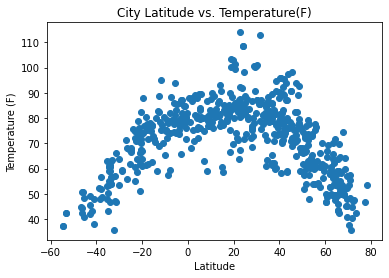

Code is analyzing the relationship between latitude and temperature. As latitude gets closer to 0, temperature increases.


In [17]:
#Latitude vs Temperature
plt.scatter(weather_df['Latitude'],weather_df['Temperature(F)'])
plt.title("City Latitude vs. Temperature(F)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.show()
print("Code is analyzing the relationship between latitude and temperature. As latitude gets closer to 0, temperature increases.")

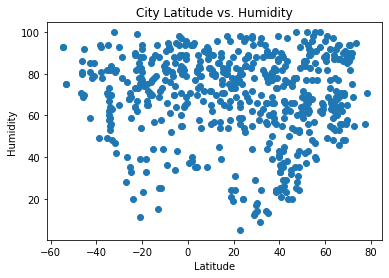

Code is analyzing the relationship between latitude and humidity. As latitude gets closer to 0, humidity tends to be at least above 40%, however latitudes higher and lower than 0 also have humidity above that value.


In [18]:
#Latitude vs Humidity
plt.scatter(weather_df['Latitude'],weather_df['Humidity'])
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()
print("Code is analyzing the relationship between latitude and humidity. As latitude gets closer to 0, humidity tends to be at least above 40%, however latitudes higher and lower than 0 also have humidity above that value.")

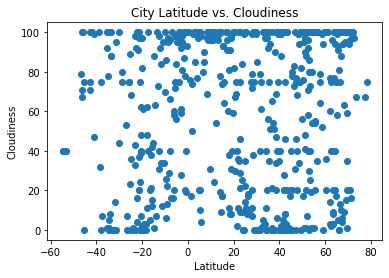

Code is analyzing latitude vs cloudiness, there is not a significant relationship between the two. 


In [20]:
#Latitude vs Cloudiness
plt.scatter(weather_df['Latitude'],weather_df['Cloudiness'])
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()
print("Code is analyzing latitude vs cloudiness, there is not a significant relationship between the two. ")

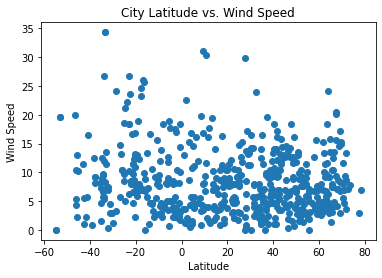

Code is analyzing latitude vs wind speed, there is not a significant relationship between the two. 


In [21]:
#Latitude vs Windspeed
plt.scatter(weather_df['Latitude'],weather_df['Wind Speed'])
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.show()
print("Code is analyzing latitude vs wind speed, there is not a significant relationship between the two. ")

In [26]:
#Create northern and southern hemisphere dataframes
north_df = weather_df.loc[(weather_df['Latitude'] > 0),:]
south_df = weather_df.loc[(weather_df['Latitude'] < 0),:]